In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("./synthetic_dataset_training_100.csv")
testing_data = pd.read_csv("./synthetic_dataset_testing_10000.csv")
data.insert(0,"x0",[1]*data.shape[0]) 
testing_data.insert(0,"x0",[1]*testing_data.shape[0]) 

In [2]:
def updateW(w, x, y):
    x = np.array(x)
    s = np.dot(w,x)
    w = w + learning_rate*(y-s)*x
    return w

def check_miss_points(w):
    for i in range(data.shape[0]):
        x = list(data.iloc()[i])[:3]

        value = np.dot(w, x)
       
        if value * data["y"][i] <= 1:
            return list(data.iloc()[i])
    return [1,1,1,-1]

def plot_graph(w):
    x_vals = list(range(-11,11,1))
    y_vals = []
    for i in x_vals:
        y = -w[0]/w[2] - (w[1]/w[2] * i)
        y_vals.append(y)

    plt.plot(x_vals, y_vals)
    plt.ylim(-11, 11)
    plt.xlim(-11, 11)

    color = np.where(data["y"]==1, "red", "blue")
    plt.scatter(list(data['x1']), list(data['x2']), c=color)
    plt.show()

def perceptron_algo(w):
    n = 0
    while n < 1000:
        x = check_miss_points(w)
        y = x[3]
        x = x[:3]
        w = updateW(w,x,y)
        n+=1
    plot_graph(w)
    print("Final Weights (Perceptron):",w)
    return w


def is_misclassified(w, point):
    x = point[0:3]
    y = point[3]
    classified_value = np.dot(w, x)
    if classified_value > 0:
        classified_value = 1
    else:
        classified_value = -1
    
    if classified_value == y:
        return True
    else:
        return False

def count_misclass(final_weights):
    count_of_misclassified = 0
    for i in range(len(data)):
        misclassified = is_misclassified(final_weights, data.iloc[i].values)
        if misclassified==True:
            count_of_misclassified+=1  
    print("Accuracy:",count_of_misclassified/len(data)*100, "%")

C:\Users\somes\AppData\Local\Temp\ipykernel_15108\210647689.py:4: RuntimeWarning: overflow encountered in multiply
  w = w + learning_rate*(y-s)*x
C:\Users\somes\AppData\Local\Temp\ipykernel_15108\210647689.py:4: RuntimeWarning: invalid value encountered in add
  w = w + learning_rate*(y-s)*x


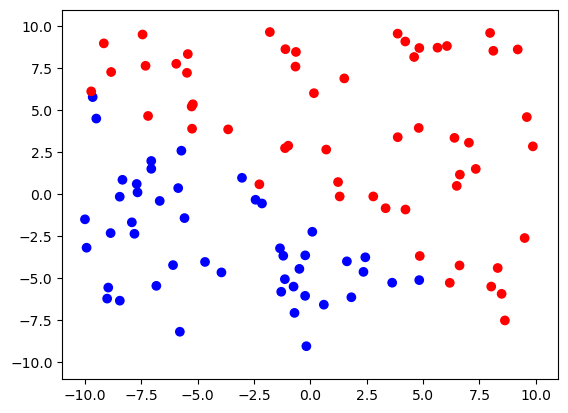

Final Weights (Perceptron): [nan nan nan]
Learning Rate is too high: 100


In [3]:
learning_rate = 100
w = [0,0,0]
w = perceptron_algo(w)
if(not np.isnan(w).any()):
    count_misclass(w)
    print("Learning Rate:", learning_rate)
else:
    print("Learning Rate is too high:", learning_rate)

C:\Users\somes\AppData\Local\Temp\ipykernel_15108\210647689.py:4: RuntimeWarning: overflow encountered in multiply
  w = w + learning_rate*(y-s)*x
C:\Users\somes\AppData\Local\Temp\ipykernel_15108\210647689.py:4: RuntimeWarning: invalid value encountered in add
  w = w + learning_rate*(y-s)*x


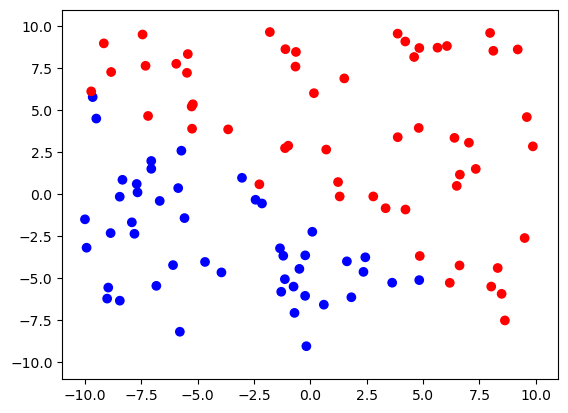

Final Weights (Perceptron): [nan nan nan]
Learning Rate is too high: 1


In [4]:
learning_rate = 1
w = [0,0,0]
w = perceptron_algo(w)
if(not np.isnan(w).any()):
    count_misclass(w)
    print("Learning Rate:", learning_rate)
else:
    print("Learning Rate is too high:", learning_rate)

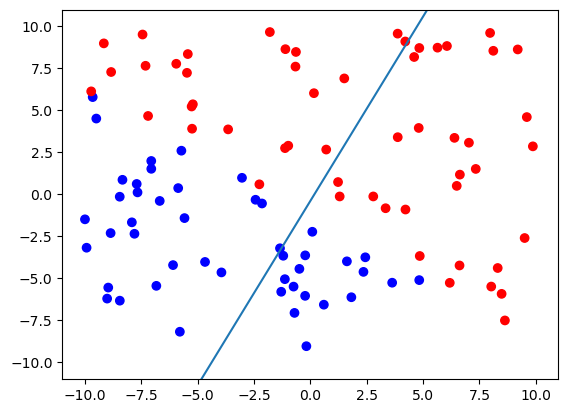

Final Weights (Perceptron): [-0.02468465  0.14119861 -0.06432937]
Accuracy: 57.99999999999999 %
Learning Rate: 0.01


In [5]:
learning_rate = 0.01
w = [0,0,0]
w = perceptron_algo(w)
if(not np.isnan(w).any()):
    count_misclass(w)
    print("Learning Rate:", learning_rate)
else:
    print("Learning Rate too high", learning_rate)

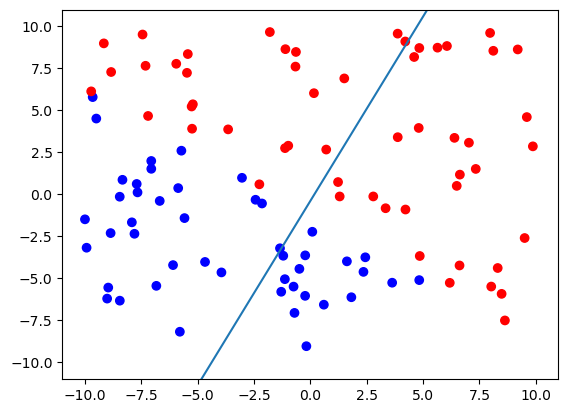

Final Weights (Perceptron): [-0.02425857  0.13876143 -0.06321901]
Accuracy: 57.99999999999999 %
Learning Rate: 0.0001


In [6]:
learning_rate = 0.0001
w = [0,0,0]
w = perceptron_algo(w)
if(not np.isnan(w).any()):
    count_misclass(w)
    print("Learning Rate:", learning_rate)
else:
    print("Learning Rate too high", learning_rate)

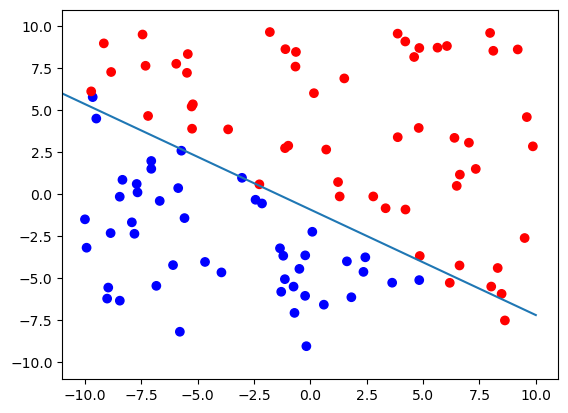

Final Weights (Perceptron): [64.44995447 45.05886151 71.75768438]
Accuracy: 97.0 %
Learning Rate: 0.055


In [7]:
learning_rate = 0.055
w = [0,0,0]
w = perceptron_algo(w)
if(not np.isnan(w).any()):
    count_misclass(w)
    print("Learning Rate:", learning_rate)
else:
    print("Learning Rate too high", learning_rate)